In [1]:
from utils import *

In [5]:
spp = 1024
render_images = True

materials = create_materials(with_fluids=False)
components = load_components(materials=materials)

# Generate the camera sensors
cam1 = create_sensor(sensor_number=1, sample_count=spp)
cam2 = create_sensor(sensor_number=2, sample_count=spp)
cam3 = create_sensor(sensor_number=3, sample_count=spp)

if render_images:
    # Generate the scene to render
    cam1_scene = load_scene(components=components, sensor=cam1)
    cam2_scene = load_scene(components=components, sensor=cam2)
    cam3_scene = load_scene(components=components, sensor=cam3)

    # Render the scenes (save so we can manually determine the pixel locations of fiducials)
    render1 = render(cam1_scene, denoise=False, save_rgb=True) 
    render2 = render(cam2_scene, denoise=False, save_rgb=True)
    render3 = render(cam3_scene, denoise=False, save_rgb=True)
    renders = [render1, render2, render3]
else:
    renders = []

2024-08-09 18:51:57 WARN main [PLYMesh] "outer_jar_outer_surface_top_distorted.ply": skipping unknown element "edge"

2024-08-09 18:51:57 WARN main [PLYMesh] "outer_jar_inner_surface_top_distorted.ply": skipping unknown element "edge"

2024-08-09 18:51:57 WARN main [PLYMesh] "inner_jar_outer_surface_bottom.ply": skipping unknown element "edge"

Saved Image: ./outputs/2024_08_09/18_51_57_rgb.png
Saved Image: ./outputs/2024_08_09/18_52_17_rgb.png
Saved Image: ./outputs/2024_08_09/18_52_35_rgb.png


In [6]:
# Extract projection matrices from sensors
c1poset = np.array(cam1['to_world'].matrix)[:3,:]
c2poset = np.array(cam2['to_world'].matrix)[:3,:]
c3poset = np.array(cam3['to_world'].matrix)[:3,:]

# Extract true camera posns
c1posnt = c1poset[:,3]
c2posnt = c2poset[:,3]
c3posnt = c3poset[:,3]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


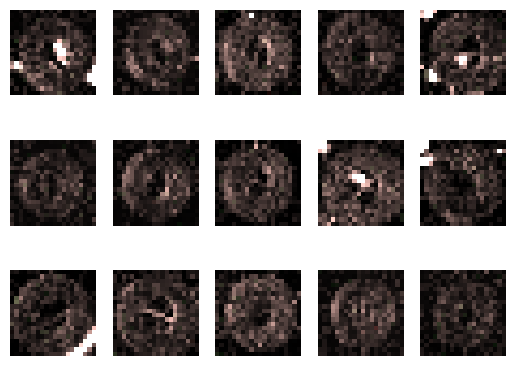

In [7]:
# Fiducial markers world space positions (cm)
objp = np.array([
    [-5.3029,  2.2389, 0.0],
    [-2.2382,  5.3024, 0.0],
    [ 0.0,     0.0,    0.0],
    [ 5.3031, -2.397,  0.0],
    [ 2.2381, -5.305,  0.0],
])

# Manually determined pixel coords of the fiducial markers
cam1_pixel_coords = np.array([
    [693.0, 232.5],
    [787.0, 249.0],
    [745.0, 374.0],
    [795.0, 512.0],
    [695.0, 516.0],
])

cam2_pixel_coords = np.array([
    [854.0, 452.0],
    [795.0, 531.0],
    [748.0, 400.0],
    [619.0, 335.0],
    [697.0, 257.0],
])

cam3_pixel_coords = np.array([
    [615.0, 494.0],
    [614.0, 372.0],
    [744.0, 426.0],
    [854.0, 368.0],
    [850.0, 469.0],
])

pixel_coords = [cam1_pixel_coords, cam2_pixel_coords, cam3_pixel_coords]

# Display the fiducial markers just to make sure we got the coords right...
if render_images:
    size = 10 # 1/2 size of fiducial marker windows
    fig, ax = plt.subplots(3, 5)
    for j, i in np.ndindex((3, 5)):
        rend = renders[j]
        coord = pixel_coords[j][i].astype(np.int32)
        coord = np.flip(coord) # need to flip for image indexing
        ax[j,i].imshow(rend[coord[0]-size:coord[0]+size, coord[1]-size:coord[1]+size], cmap='gray')
        ax[j,i].axis('off')

In [5]:
cameraMatrix = get_ideal_camera_matrix(fov=100, fov_axis='x', image_width=1280, image_height=800)
distortionCoefficients = None

print(cameraMatrix)
print(distortionCoefficients)

[[537.02376395   0.         640.        ]
 [  0.         537.02376395 400.        ]
 [  0.           0.           1.        ]]
None


In [6]:
ret1, rvec1, tvec1 = cv2.solvePnP(objp, cam1_pixel_coords, cameraMatrix, distortionCoefficients)
print('Camera 1:')
print('Translation Vector:\n', tvec1, end='\n\n')
print('Rotation Vector:\n', rvec1, end='\n\n')
R1, _ = cv2.Rodrigues(rvec1)
print('Rotation Matrix:\n', R1, end='\n\n')


ret2, rvec2, tvec2 = cv2.solvePnP(objp, cam2_pixel_coords, cameraMatrix, distortionCoefficients)
print('Camera 2:')
print('Translation Vector:\n', tvec2, end='\n\n')
print('Rotation Vector:\n', rvec2, end='\n\n')
R2, _ = cv2.Rodrigues(rvec2)
print('Rotation Matrix:\n', R2, end='\n\n')


ret3, rvec3, tvec3 = cv2.solvePnP(objp, cam3_pixel_coords, cameraMatrix, distortionCoefficients)
print('Camera 3:')
print('Translation Vector:\n', tvec3, end='\n\n')
print('Rotation Vector:\n', rvec3, end='\n\n')
R3, _ = cv2.Rodrigues(rvec3)
print('Rotation Matrix:\n', R3, end='\n\n')

Camera 1:
Translation Vector:
 [[ 4.06990367]
 [-1.03999094]
 [20.85891434]]

Rotation Vector:
 [[2.65156725]
 [1.12318608]
 [0.41755727]]

Rotation Matrix:
 [[ 0.66534962  0.66112748  0.34672806]
 [ 0.72706975 -0.67923171 -0.10006929]
 [ 0.16935013  0.31867655 -0.93261235]]

Camera 2:
Translation Vector:
 [[ 4.17753887]
 [ 0.03553391]
 [20.70719781]]

Rotation Vector:
 [[0.01463247]
 [2.74994027]
 [0.04406   ]]

Rotation Matrix:
 [[-0.92437462  0.00412775  0.38146366]
 [ 0.01634624  0.99945165  0.02879584]
 [-0.38113562  0.03285364 -0.92393521]]

Camera 3:
Translation Vector:
 [[ 4.03789726]
 [ 0.97135175]
 [20.82499609]]

Rotation Vector:
 [[-2.6481281 ]
 [ 1.13678047]
 [-0.47820406]]

Rotation Matrix:
 [[ 0.64784618 -0.66121733  0.37826838]
 [-0.73278452 -0.67660979  0.07229136]
 [ 0.20813978 -0.32402289 -0.92286889]]



In [7]:
c1posnp = -(R1.T)@tvec1
print("=== Camera 1:")
print("Calculated Camera Position:\n", c1posnp.flatten(), end='\n\n')
print("True Camera Position:\n",  c1posnt, end='\n\n')
print("Difference:", c1posnp.flatten() - c1posnt)
print("Difference Magnitude:", np.linalg.norm(c1posnp.flatten() - c1posnt))
print()

c2posnp = -(R2.T)@tvec2
print("=== Camera 2:")
print("Calculated Camera Position:\n", c2posnp.flatten(), end='\n\n')
print("True Camera Position:\n",  c2posnt, end='\n\n')
print("Difference:", c2posnp.flatten() - c2posnt)
print("Difference Magnitude:", np.linalg.norm(c2posnp.flatten() - c2posnt))
print()

c3posnp = -(R3.T)@tvec3
print("=== Camera 3:")
print("Calculated Camera Position:\n", c3posnp.flatten(), end='\n\n')
print("True Camera Position:\n",  c3posnt, end='\n\n')
print("Difference:", c3posnp.flatten() - c3posnt)
print("Difference Magnitude:", np.linalg.norm(c3posnp.flatten() - c3posnt))
print()

=== Camera 1:
Calculated Camera Position:
 [ -5.48422285 -10.04436686  17.93806006]

True Camera Position:
 [ -5.963346 -10.328704  17.848883]

Difference: [0.47912316 0.28433702 0.08917739]
Difference Magnitude: 0.5642332375026725

=== Camera 2:
Calculated Camera Position:
 [11.75328075 -0.73306505 17.53750673]

True Camera Position:
 [ 1.1928695e+01 -2.2059578e-05  1.7849874e+01]

Difference: [-0.17541398 -0.73304299 -0.31236777]
Difference Magnitude: 0.8159017801673896

=== Camera 3:
Calculated Camera Position:
 [-6.23865499 10.07492927 17.62111191]

True Camera Position:
 [-5.9638467 10.3296175 17.851877 ]

Difference: [-0.2748083  -0.25468823 -0.2307653 ]
Difference Magnitude: 0.4400435455858636



In [8]:
zrot = np.array([[-1.0, 0.0, 0.0], [0.0, -1.0, 0.0], [0.0, 0.0, 1.0]]) # 180 deg rotation about z axis (necessary to match mitsuba assumption about left handed coordinates)

print("Camera 1:")
print("True Pose Matrix:")
print(c1poset)
print()
print("Estimated Pose Matrix:")
c1posep = np.concatenate([zrot @ R1, zrot @ tvec1], axis=1)
c1posep = np.linalg.inv(np.concatenate([c1posep, [[0.0, 0.0, 0.0, 1.0]]], axis=0))[:3,:]
print(c1posep)
print()

print("Camera 2:")
print("True Pose Matrix:")
print(c2poset)
print()
print("Estimated Pose Matrix:")
c2posep = np.concatenate([zrot @ R2, zrot @ tvec2], axis=1)
c2posep = np.linalg.inv(np.concatenate([c2posep, [[0.0, 0.0, 0.0, 1.0]]], axis=0))[:3,:]
print(c2posep)
print()

print("Camera 3:")
print("True Pose Matrix:")
print(c3poset)
print()
print("Estimated Pose Matrix:")
c3posep = np.concatenate([zrot @ R3, zrot @ tvec3], axis=1)
c3posep = np.linalg.inv(np.concatenate([c3posep, [[0.0, 0.0, 0.0, 1.0]]], axis=0))[:3,:]
print(c3posep)
print()

Camera 1:
True Pose Matrix:
[[ -0.65651083  -0.7296439    0.19134612  -5.963346  ]
 [ -0.65651083   0.6776173    0.33140364 -10.328704  ]
 [ -0.371466     0.09194928  -0.92388225  17.848883  ]]

Estimated Pose Matrix:
[[ -0.66534962  -0.72706975   0.16935013  -5.48422285]
 [ -0.66112748   0.67923171   0.31867655 -10.04436686]
 [ -0.34672806   0.10006929  -0.93261235  17.93806006]]

Camera 2:
True Pose Matrix:
[[ 9.2387486e-01 -8.4420835e-06 -3.8269472e-01  1.1928695e+01]
 [ 0.0000000e+00 -1.0000000e+00  2.2059578e-05 -2.2059578e-05]
 [-3.8269472e-01 -2.0380288e-05 -9.2387486e-01  1.7849874e+01]]

Estimated Pose Matrix:
[[ 9.24374621e-01 -1.63462428e-02 -3.81135621e-01  1.17532807e+01]
 [-4.12775009e-03 -9.99451650e-01  3.28536386e-02 -7.33065051e-01]
 [-3.81463658e-01 -2.87958371e-02 -9.23935213e-01  1.75375067e+01]]

Camera 3:
True Pose Matrix:
[[-0.6565078   0.7296465   0.19134672 -5.9638467 ]
 [ 0.6565078   0.6776134  -0.33141768 10.3296175 ]
 [-0.37147677 -0.09195767 -0.9238771  17

In [9]:
# Save the projection matrices for use in other files
save_dir = "outputs/estimated_pose_matrices/"
np.save(save_dir+"c1posep.npy", c1posep)
np.save(save_dir+"c2posep.npy", c2posep)
np.save(save_dir+"c3posep.npy", c3posep)